In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/epoch/model.ckpt-30.00-24600'
model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil'
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  
                         image_model=image_model,
                         index=-1)

text_strs = np.load(os.path.join(valid_dir, 'distinct_text_strs.npy'))
img2text = np.load(os.path.join(valid_dir, 'img2text.npy')).item()

tensorflow_version: 1.4.0


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature
preprocessing_fn net_name inception_resnet_v2 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_resnet_v2 height 299 width 299
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionResnetV2 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt
image_model: <melt.image.image_model.ImageModel object at 0x7f2660e7d410>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt duration: 6.68122911453
ENCODE_UNK 1
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/model.ckpt-69.51-57000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/model.ckpt-69.51-57000.map duration: 1.15888094902


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 743e12038dcf7dbc68123ca7dff9d6d66eb09ea1


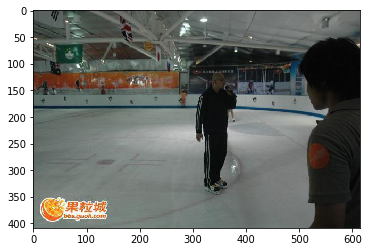

topwords of image:
0 大厅 0.566777|1 车站里 0.54618|2 工厂 0.540987|3 乘客 0.522362|4 站台 0.510274|5 列车员 0.492929|6 遮阳棚 0.477306|7 候车 0.475473|8 稀少 0.469209|9 车间 0.468162|10 大巴 0.466332|11 展 0.46481|12 车厢 0.457972|13 保龄球馆 0.454973|14 敞亮 0.454619|15 直升飞机 0.451522|16 里 0.450077|17 保龄球 0.449782|18 月 0.437897|19 棚里 0.429753|20 直升机 0.428251|21 机场 0.426213|22 签到 0.424312|23 检票口 0.420304|24 背后 0.419853|25 大巴车 0.418293|26 玻璃球 0.418287|27 出口 0.417327|28 整 0.413123|29 拼接 0.410968|30 飞机 0.407375|31 船舱 0.406639|32 礼仪 0.405985|33 站姿 0.400111|34 座位 0.398696|35 压腿 0.398059|36 开船 0.398047|37 附近 0.397478|38 身后 0.394658|39 候车室 0.39465|40 地下 0.393516|41 卧铺 0.390729|42 射击场 0.390029|43 暖手 0.387291|44 踢毽子 0.384428|45 内 0.383031|46 介 0.382634|47 签约 0.381903|48 练习 0.380826|49 快乐 0.38016|50 牌 0.378647|51 客车 0.378025|52 休闲装 0.377255|53 闸 0.377235|54 模型 0.376816|55 黑色 0.375585|56 棚子 0.375356|57 牛棚 0.374721|58 深色 0.374397|59 之间 0.374008|60 一副 0.373914|61 边包 0.372925|62 衣服 0.372627|63 飞机场 0.370375|64 明 0.369967|65 低头 0.3686

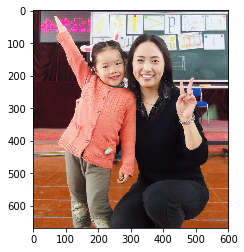

topwords of image:
0 化妆 0.673532|1 下巴 0.60859|2 打电话 0.597885|3 举 0.591324|4 面带微笑 0.586714|5 吃 0.582916|6 合十 0.560796|7 打招呼 0.559845|8 胳膊 0.554577|9 休息区 0.553735|10 举着 0.551169|11 比 0.549055|12 电话 0.547058|13 手机 0.546325|14 搂 0.546204|15 毛衣 0.542918|16 蹲 0.536877|17 嘴边 0.533471|18 鼓掌 0.530579|19 自拍 0.520871|20 喝 0.517628|21 嘴 0.516632|22 跪 0.514359|23 剪刀手 0.509795|24 脸上 0.509356|25 部手机 0.507489|26 举起 0.506342|27 抽烟 0.504315|28 吃水果 0.50227|29 背靠 0.500169|30 耳边 0.498592|31 并肩 0.495031|32 裤子 0.49409|33 牛仔衣 0.493173|34 两腿 0.488595|35 抽 0.488451|36 后撑 0.487608|37 冰淇淋 0.486417|38 美丽 0.485451|39 女孩 0.48302|40 单膝 0.481394|41 长裤 0.480865|42 肩 0.478449|43 唇边 0.478061|44 贴着 0.478006|45 坐在 0.476654|46 女生 0.476299|47 红包 0.474957|48 吹埙 0.47473|49 衣领 0.473766|50 挽 0.472952|51 额头 0.471334|52 右臂 0.466899|53 凳子 0.466265|54 撩 0.464465|55 冷饮 0.463373|56 吸烟 0.462402|57 对方 0.462008|58 鼻子 0.461844|59 榴莲 0.461811|60 高举着 0.46101|61 项链 0.458551|62 目视 0.455117|63 噘 0.454395|64 拥 0.453663|65 抬起 0.453242|66 头上 0.45

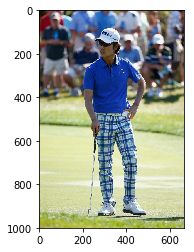

topwords of image:
0 人群 0.737353|1 喧闹 0.704249|2 人来人往 0.667762|3 熙攘 0.624942|4 远处 0.609128|5 熙熙攘攘 0.587296|6 稀少 0.586299|7 围观 0.57152|8 杆 0.568276|9 人间 0.563693|10 球杆 0.563173|11 草坪 0.551296|12 格子 0.546327|13 热闹 0.545129|14 高尔夫球场 0.545094|15 附近 0.544464|16 不远处 0.542029|17 触 0.539007|18 拄着 0.53272|19 草地 0.52814|20 一群 0.522936|21 后面 0.511094|22 叉腰 0.510317|23 包旁 0.509556|24 中 0.509152|25 双肩包 0.509079|26 人头攒动 0.508798|27 四号 0.504856|28 操场上 0.500742|29 人前 0.490616|30 高尔夫球 0.487132|31 人旁 0.487097|32 人中 0.486774|33 六位 0.484015|34 跳绳 0.483446|35 人山人海 0.483218|36 猜拳 0.480463|37 九号 0.479911|38 评委 0.477143|39 7 0.472368|40 羊角 0.468802|41 中间 0.467195|42 拥挤 0.465633|43 挂 0.465535|44 和 0.463629|45 旁边 0.461511|46 斑点 0.461038|47 拽 0.459846|48 右拳 0.458002|49 码 0.455651|50 恤 0.451571|51 板球 0.45061|52 共享 0.450585|53 前面 0.45027|54 衣角 0.449727|55 水瓶 0.449218|56 蒙着 0.44664|57 强 0.445947|58 环卫工人 0.443868|59 传单 0.442431|60 帽子 0.441411|61 运动衫 0.434337|62 市场 0.429568|63 议 0.428563|64 赶猪 0.427176|65 晚 0.426672|

In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  plt.subplot(1, 1, 1)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  i = 0
  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    text = text.replace(' ', '')
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))